# McKinney Chapter 5 - Practice (Section 3, Monday 2:45 PM)

## Announcements

- Due soon
    - 11:59 PM on Friday, 2/3: Quiz 2
    - 11:59 PM on Friday, 2/3: 10,000 XP on DataCamp
    - Project groups
        - 9 AM on Monday, 2/6: I will open groups on Canvas
        - 9 AM on Monday, 2/13: I will close groups and post project 1

## Practice

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import yfinance as yf
import requests_cache

In [2]:
%config InlineBackend.figure_format = 'retina'
%precision 4
pd.options.display.float_format = '{:.4f}'.format
session = requests_cache.CachedSession(expire_after='1D')

In [3]:
tickers = yf.Tickers('AAPL IBM MSFT GOOG', session=session) # initiates a tickers object
prices = tickers.history(period='max', auto_adjust=False) # downloads history data
prices.index = prices.index.tz_localize(None) # removes time zone data from index
returns = prices['Adj Close'].pct_change().dropna() # calculates returns and drops dates with missing returns
returns

[                       0%                       ]

[**********************50%                       ]  2 of 4 completed

[**********************75%***********            ]  3 of 4 completed

[*********************100%***********************]  4 of 4 completed

,AAPL,GOOG,IBM,MSFT
Date,,,,
2004-08-20,0.0029,0.0794,0.0042,0.0029
2004-08-23,0.0091,0.0101,-0.0070,0.0044
2004-08-24,0.0280,-0.0414,0.0007,0.0000
2004-08-25,0.0344,0.0108,0.0043,0.0114
2004-08-26,0.0487,0.0180,-0.0045,-0.0040
...,...,...,...,...
2023-02-07,0.0192,0.0442,-0.0025,0.0420
2023-02-08,-0.0177,-0.0744,0.0010,-0.0031
2023-02-09,-0.0069,-0.0454,-0.0043,-0.0117


### What are the mean daily returns for these four stocks?

By default, the `.mean()` method calculates means up-and-down columns (i.e., `axis=0`).

In [4]:
returns.mean()

AAPL   0.0015
GOOG   0.0010
IBM    0.0003
MSFT   0.0007
dtype: float64

We set `axis=1` if we want to calculate means left-and-right across rows.

In [5]:
returns.mean(axis=1)

Date
2004-08-20    0.0224
2004-08-23    0.0041
2004-08-24   -0.0032
2004-08-25    0.0152
2004-08-26    0.0146
               ...  
2023-02-07    0.0257
2023-02-08   -0.0235
2023-02-09   -0.0171
2023-02-10    0.0020
2023-02-13    0.0059
Length: 4653, dtype: float64

### What are the standard deviations of daily returns for these four stocks?

In [6]:
returns.std()

AAPL   0.0210
GOOG   0.0195
IBM    0.0144
MSFT   0.0173
dtype: float64

And the `.describe()` is a great way to get common summary statistics.

In [7]:
returns.describe()

,AAPL,GOOG,IBM,MSFT
count,4653.0000,4653.0000,4653.0000,4653.0000
mean,0.0015,0.0010,0.0003,0.0007
std,0.0210,0.0195,0.0144,0.0173
min,-0.1792,-0.1161,-0.1285,-0.1474
25%,-0.0085,-0.0077,-0.0063,-0.0071
50%,0.0011,0.0007,0.0005,0.0004
75%,0.0121,0.0101,0.0074,0.0088
max,0.1390,0.1999,0.1151,0.1860


### What are the *annualized* means and standard deviations of daily returns for these four stocks?

In [8]:
returns.mean().mul(252) # multiply by the number of periods per year to annualize a mean

AAPL   0.3694
GOOG   0.2443
IBM    0.0835
MSFT   0.1855
dtype: float64

In [9]:
returns.std().mul(np.sqrt(252)) # multiply by the SQUARE ROOT of the number of periods per year to annualize a std. dev.

AAPL   0.3330
GOOG   0.3089
IBM    0.2292
MSFT   0.2741
dtype: float64

***The best explanation I have found on why stock return volatility (the standard deviation of stocks returns) grows with the square root of time is at the bottom of page 7 of [chapter 8 of Ivo Welch's free corporate finance textbook](https://book.ivo-welch.info/read/source5.mba/08-invchoice.pdf).***

### Plot *annualized* means versus standard deviations of daily returns for these four stocks

Use `plt.scatter()`, which expects arguments as `x` (standard deviations) then `y` (means).

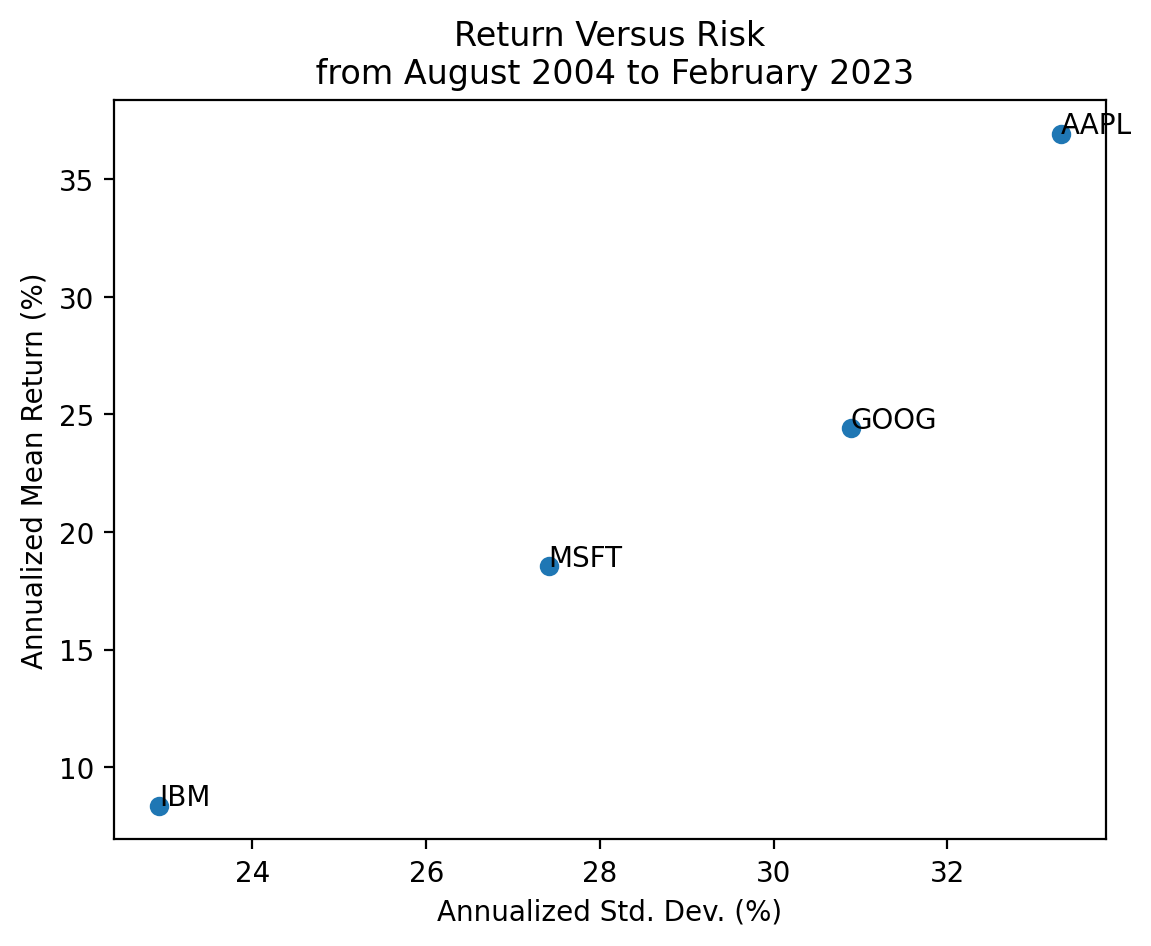

In [10]:
plt.scatter(
    x=returns.std().mul(np.sqrt(252) * 100),
    y=returns.mean().mul(252 * 100)
)
plt.xlabel('Annualized Std. Dev. (%)')
plt.ylabel('Annualized Mean Return (%)')
plt.title(f'Return Versus Risk\n from {returns.index[0]:%B %Y} to {returns.index[-1]:%B %Y}')

for i in returns:
    plt.text(
        x=returns[i].std() * np.sqrt(252) * 100, 
        y=returns[i].mean() * 252 * 100, 
        s=i
    )

plt.show()

### Repeat the previous calculations and plot for the stocks in the Dow-Jones Industrial Index (DJIA)

We can find the current DJIA stocks on [Wikipedia](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average).
We will need to download new data, into `tickers2`, `prices2`, and `returns2`.

In [11]:
symbols = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]['Symbol']

In [12]:
tickers2 = yf.Tickers(tickers=symbols.to_list(), session=session)
prices2 = tickers2.history(period='max', auto_adjust=False)
prices2.index = prices2.index.tz_localize(None)
returns2 = prices2['Adj Close'].pct_change().dropna()
# returns2

[                       0%                       ]

[***                    7%                       ]  2 of 30 completed

[*****                 10%                       ]  3 of 30 completed

[******                13%                       ]  4 of 30 completed

[********              17%                       ]  5 of 30 completed

[**********            20%                       ]  6 of 30 completed

[***********           23%                       ]  7 of 30 completed

[*************         27%                       ]  8 of 30 completed

[**************        30%                       ]  9 of 30 completed

[****************      33%                       ]  10 of 30 completed

[******************    37%                       ]  11 of 30 completed

[*******************   40%                       ]  12 of 30 completed

[********************* 43%                       ]  13 of 30 completed

[**********************47%                       ]  14 of 30 completed

[**********************50%                       ]  15 of 30 completed

[**********************53%                       ]  16 of 30 completed

[**********************57%**                     ]  17 of 30 completed

[**********************60%****                   ]  18 of 30 completed

[**********************63%*****                  ]  19 of 30 completed

[**********************67%*******                ]  20 of 30 completed

[**********************70%*********              ]  21 of 30 completed

[**********************73%**********             ]  22 of 30 completed

[**********************77%************           ]  23 of 30 completed

[**********************80%*************          ]  24 of 30 completed

[**********************83%***************        ]  25 of 30 completed

[**********************87%*****************      ]  26 of 30 completed

[**********************90%******************     ]  27 of 30 completed

[**********************93%********************   ]  28 of 30 completed

[**********************97%********************** ]  29 of 30 completed

[*********************100%***********************]  30 of 30 completed

In [13]:
prices2['Adj Close'].count().nsmallest(5).div(252)

DOW     3.9048
V      14.8929
CRM    18.6270
GS     23.7500
CSCO   32.9802
dtype: float64

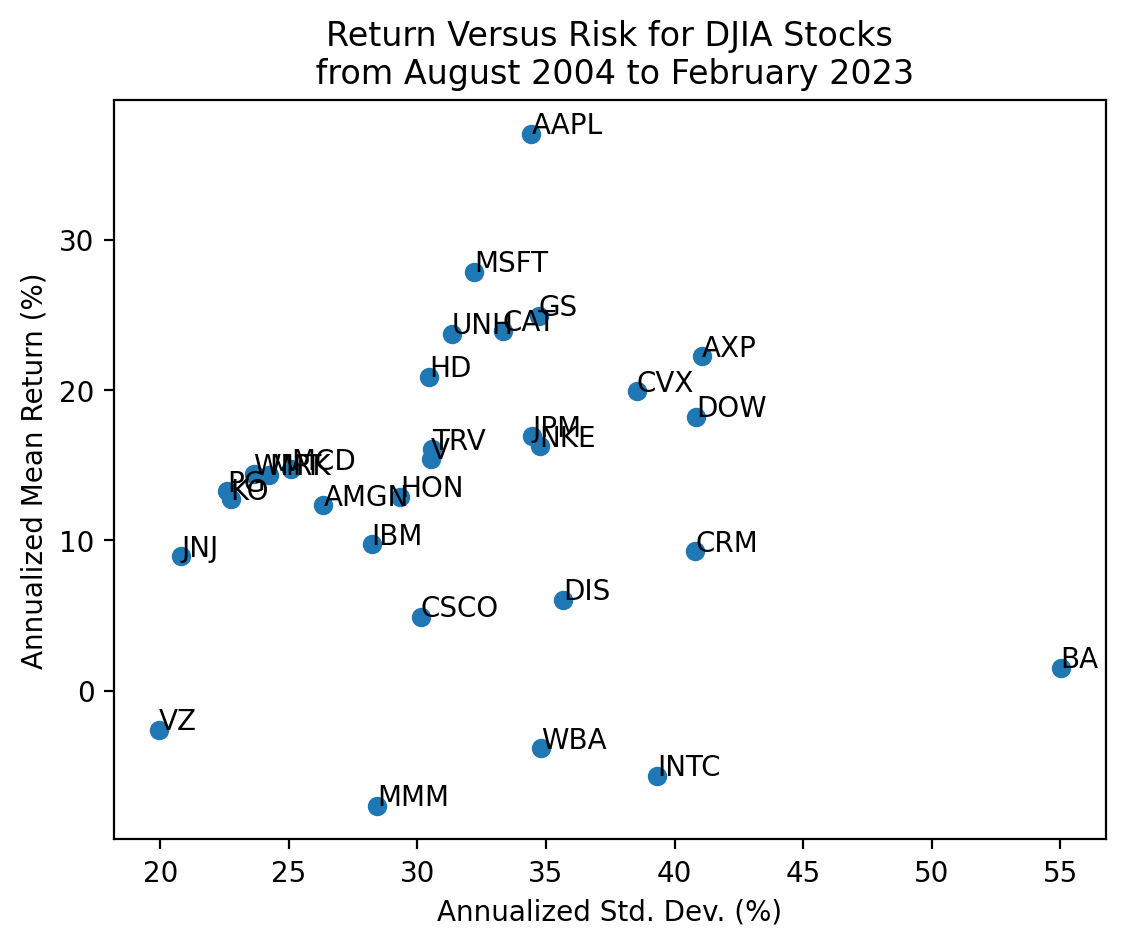

In [14]:
plt.scatter(
    x=returns2.std().mul(np.sqrt(252) * 100),
    y=returns2.mean().mul(252 * 100)
)
plt.xlabel('Annualized Std. Dev. (%)')
plt.ylabel('Annualized Mean Return (%)')
plt.title(f'Return Versus Risk for DJIA Stocks\n from {returns.index[0]:%B %Y} to {returns.index[-1]:%B %Y}')


for i in returns2:
    plt.text(
        x=returns2[i].std() * np.sqrt(252) * 100, 
        y=returns2[i].mean() * 252 * 100, 
        s=i
    )

plt.show()

### Calculate total returns for the stocks in the DJIA

We can use the `.prod()` method to compound returns as $1 + R_T = \prod_{t=1}^T (1 + R_t)$.
Technically, we should write $R_T$ as $R_{0,T}$, but we typically omit the subscript $0$.

In [15]:
returns2_total = returns2.add(1).prod().sub(1)

In [16]:
returns2_total_alt = (returns2 + 1).prod() - 1

The two approaches above are correct and calculate the same values, as shown by `np.allclose()` below.
Still, I prefer the first approach because chained code is typically easier to write, read, and troubleshoot.

In [17]:
np.allclose(returns2_total, returns2_total_alt)

True

### Plot the distribution of total returns for the stocks in the DJIA

We can plot a histogram, using either the `plt.hist()` function or the `.plot(kind='hist')` method.

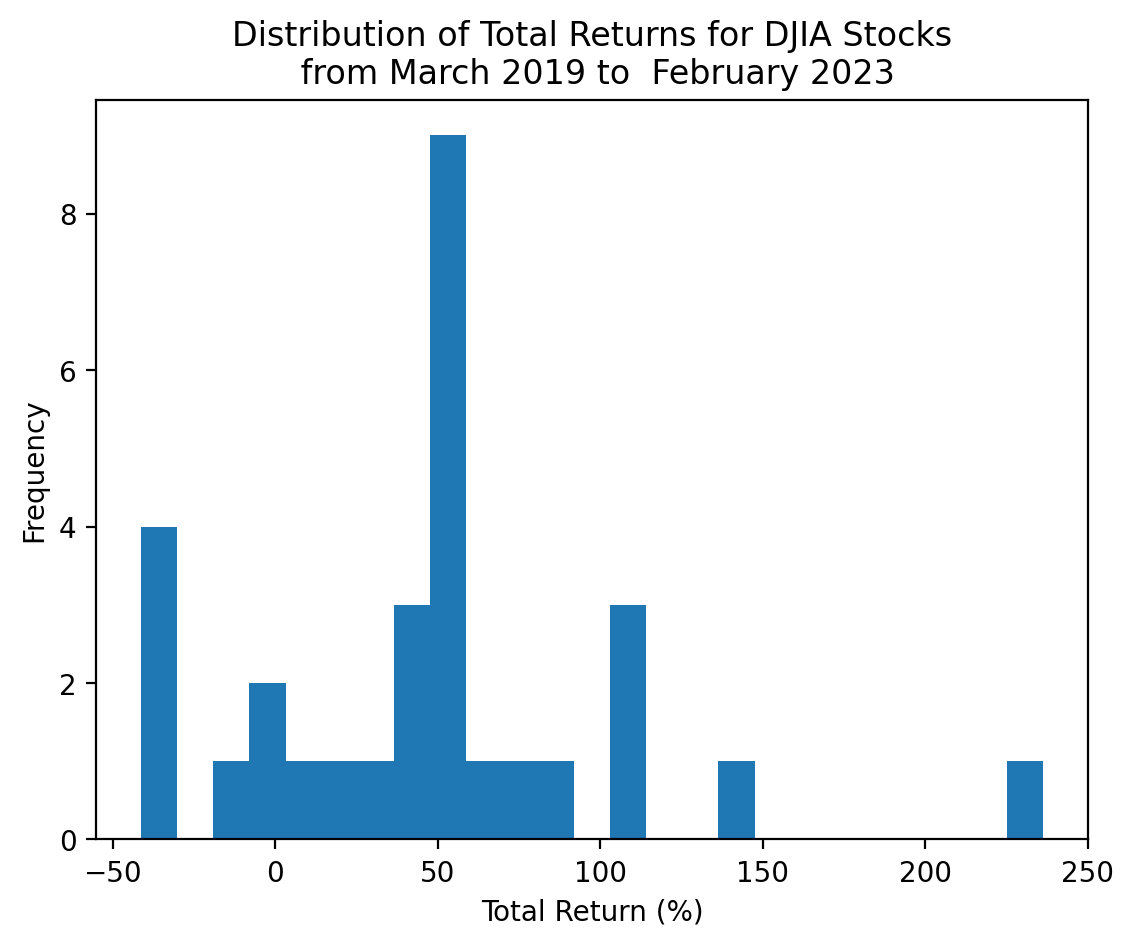

In [18]:
returns2_total.mul(100).plot(kind='hist', bins=25)
plt.xlabel('Total Return (%)')
plt.title(f'Distribution of Total Returns for DJIA Stocks\n from {returns2.index[0]:%B %Y} to  {returns2.index[-1]:%B %Y}')
plt.show()

### Which stocks have the minimum and maximum total returns?

In [19]:
returns2_total.idxmin()

'BA'

In [20]:
returns2_total.idxmax()

'AAPL'

In [21]:
returns2_total.sort_values()[[0, -1]]

BA     -0.4120
AAPL    2.3628
dtype: float64

### Plot the cumulative returns for the stocks in the DJIA

We can use the cumulative product method `.cumprod()` to calculate the right hand side of the formula above.

The following code works, but the cumulative returns of 30 stocks is typically too much to digest.
Plus, the legend runs off the screen!

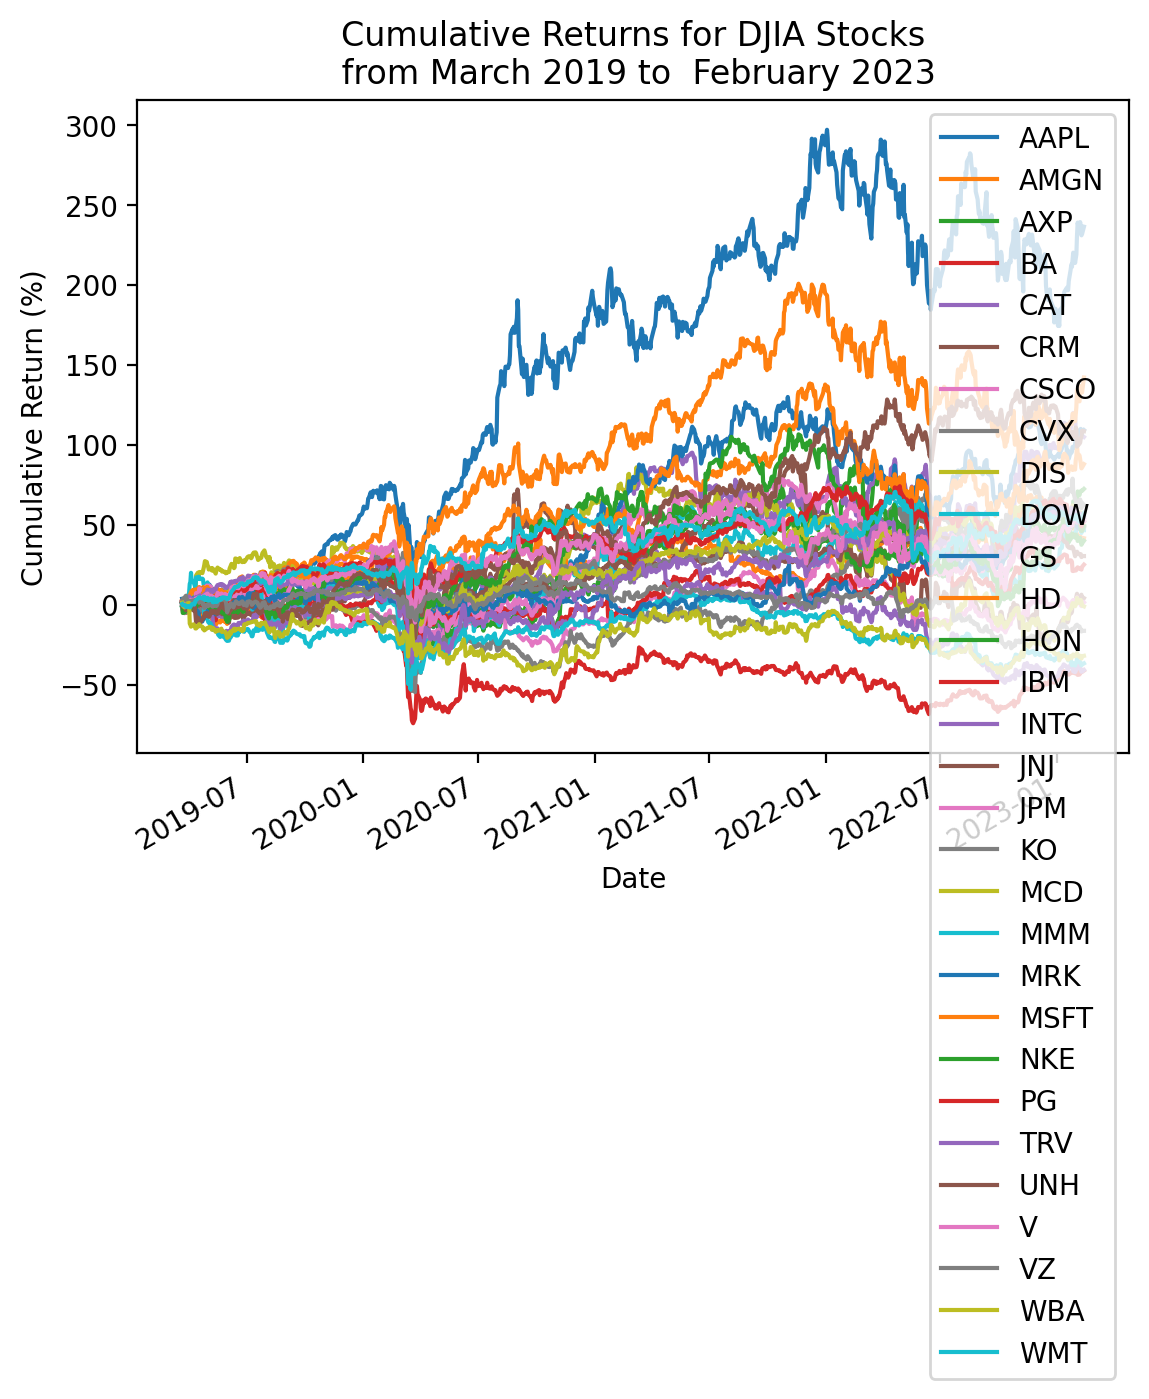

In [22]:
returns2.add(1).cumprod().sub(1).mul(100).plot()
plt.ylabel('Cumulative Return (%)')
plt.title(f'Cumulative Returns for DJIA Stocks\n from {returns2.index[0]:%B %Y} to  {returns2.index[-1]:%B %Y}')
plt.show()

### Repeat the plot above with only the minimum and maximum total returns

In [23]:
returns2_total.sort_values()[[0, -1]].index

Index(['BA', 'AAPL'], dtype='object')

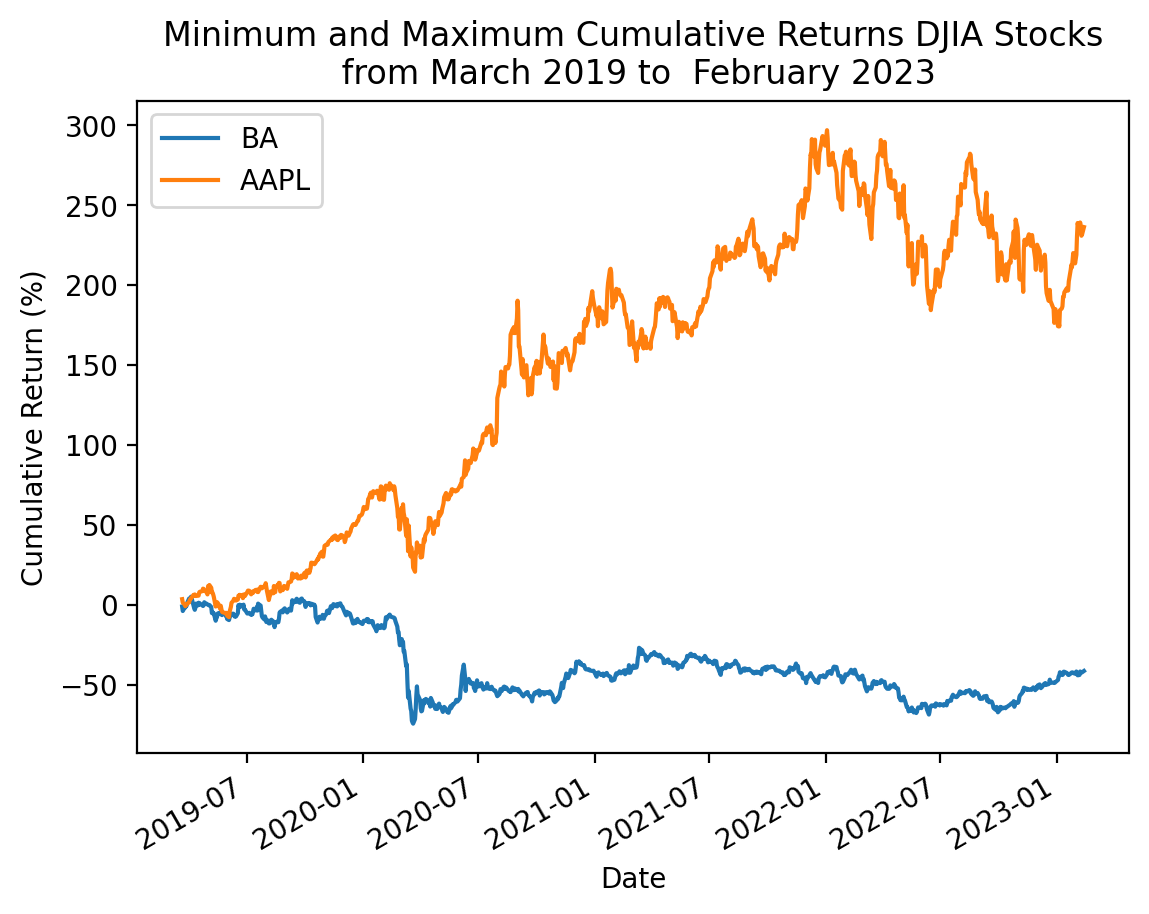

In [24]:
(
    returns2[ # daily returns for DJIA stocks
        returns2_total.sort_values()[[0, -1]].index # tickers of stocks with min and max total returns
        # returns2.add(1).prod().sort_values()[[0, -1]].index # 
    ]
    .add(1) # adds 1 to every daily return 
    .cumprod() # calculate cumulative returns for each stock
    .sub(1) # substracts 1 from every cumulative return
    .mul(100) # converts decimal to percent returns
    .plot() # plots
)
plt.ylabel('Cumulative Return (%)')
plt.title(f'Minimum and Maximum Cumulative Returns DJIA Stocks\n from {returns2.index[0]:%B %Y} to  {returns2.index[-1]:%B %Y}')
plt.show()